In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [3]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
#np.matmul(A,A)
np.matmul(np.matrix.transpose(A),C)
# np.matmul(B,np.matrix.transpose(B))
# np.matmul(np.matrix.transpose(B),B)
# np.matmul(B,C)
# np.matmul(C,B)
# np.matmul(np.matrix.transpose(C),B)
np.matmul(C,np.matrix.transpose(B))

array([[ 3.07497768,  0.78814692, -4.32480733],
       [ 5.38567186, -0.7621223 ,  1.24801802],
       [ 4.86626083,  2.23656617,  1.64849483],
       [ 1.90933173, -5.34414969,  1.92311457]])

In [4]:
#Challenge
#Gerenerate two matrices
#build a product matrix layer wise (for loop)
#implement the matrix multiplication directly
# compare the result.
np.random.seed(0)
row = 3
column = 4
k = np.random.randint(0, 10, 12).reshape(row,column)
m = np.random.randint(10, 20, 12).reshape(row,column)
print(k)
print(m)
r = np.zeros(9).reshape(3,3)
for i in range(column):
    r = r + np.outer(k[:,i], m.T[i,:])
result = np.matmul(k,m.T)
print(result)
print(r)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[18 18 11 16]
 [17 17 18 11]
 [15 19 18 19]]
[[171 172 186]
 [401 381 425]
 [281 294 346]]
[[171. 172. 186.]
 [401. 381. 425.]
 [281. 294. 346.]]



---
# VIDEO: Order-of-operations on matrices
---


In [5]:

n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = np.matrix.transpose(E) @ np.matrix.transpose(V) @ np.matrix.transpose(I) @ np.matrix.transpose(L)

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[ 8.8817842e-16, -8.8817842e-16],
       [-8.8817842e-16,  0.0000000e+00]])


---
# VIDEO: Matrix-vector multiplication
---


In [6]:
# number of elements
m = 4

# create matrices
N = np.round( 10*np.random.randn(m,m) )
print(N)
# later. Creating symmetric matrix.
print(np.matrix.transpose(N)*N)
S = np.round( np.matrix.transpose(N)*N/m**2 ) # scaled symmetric
print(S)
# and vector
w = np.array([-1, 0, 1, 2])


[[ -4.  -8.  -4.  -5.]
 [  8.  -2.  22. -10.]
 [  1.   2.  -5. -11.]
 [  6.  14.  -2.  -1.]]
[[  16.  -64.   -4.  -30.]
 [ -64.    4.   44. -140.]
 [  -4.   44.   25.   22.]
 [ -30. -140.   22.    1.]]
[[ 1. -4. -0. -2.]
 [-4.  0.  3. -9.]
 [-0.  3.  2.  1.]
 [-2. -9.  1.  0.]]


In [7]:
# with symmetric matrix. meaning S^t == S
# NOTE: The @ symbol for matrix multiplication is relatively new to Python
print(S@w)    # 1
print(np.matrix.transpose(S@w)) # 2
print(w@S)    # 3
print(np.matrix.transpose(w)@np.matrix.transpose(S))  # 4
print(np.matrix.transpose(w)@S)   # 5
np.matrix.transpose(w) - w

[ -5. -11.   4.   3.]
[ -5. -11.   4.   3.]
[ -5. -11.   4.   3.]
[ -5. -11.   4.   3.]
[ -5. -11.   4.   3.]


array([0, 0, 0, 0])

In [8]:
# with nonsymmetric matrix
# S^t != S
print(N@w)    # 1
print(np.matrix.transpose(N@w)) # 2
print(w@N)    # 3
print(np.matrix.transpose(w)@np.matrix.transpose(N))  # 4
print(np.matrix.transpose(w)@N)   # 5

[-10.  -6. -28. -10.]
[-10.  -6. -28. -10.]
[17. 38. -5. -8.]
[-10.  -6. -28. -10.]
[17. 38. -5. -8.]



---
# VIDEO: 2D transformation matrices
---


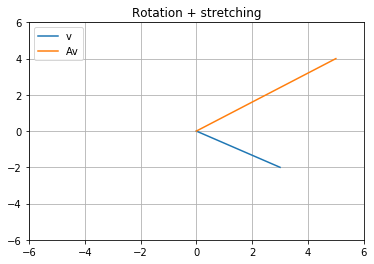

In [9]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

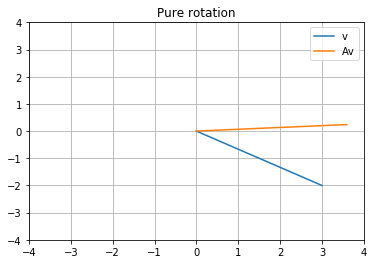

In [10]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

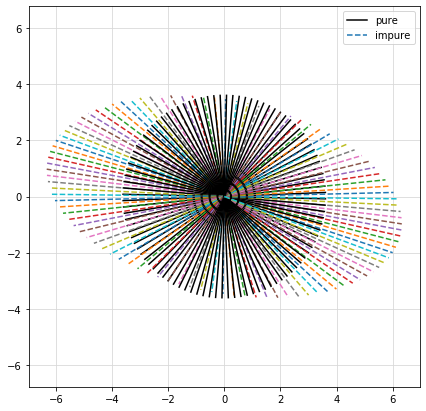

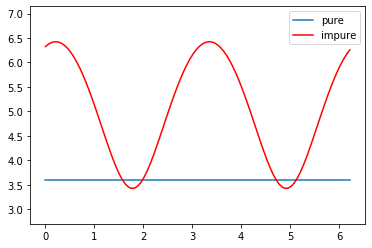

In [11]:
#challenge
# 2x2 rotation matrix
#이 때, 맨앞의 cos*2를 해주면 vector의 magnitude는 th의 값에 따라 결정된다. 
# pure rotation 식과 impure roatation(2*cos) 에서 0도에서 360도로 각이 변할때, vector의 magnitude를 구하고 이를 그래프에 그려라
# solution 

Theta = []
Magnitudes = []
Magnitudes2=[]
v = np.array([3, -2])
terms = np.linspace(0, np.pi*2, 100)

for x in range(len(terms)):
    thetas = x * 2*np.pi/100
    Theta.append(thetas)
    
    A1 = np.array([[np.cos(thetas), -np.sin(thetas)], 
                  [np.sin(thetas), np.cos(thetas)]])
    A2 = np.array([[2*np.cos(thetas), -np.sin(thetas)], 
                  [np.sin(thetas), np.cos(thetas)]])
    
    vec1 = np.matmul(A1,v)
    vec2 = np.matmul(A2,v)
    Magnitudes.append(np.linalg.norm(vec1))
    Magnitudes2.append(np.linalg.norm(vec2))
    
    plt.figure(1, figsize=(7,7))
    plt.axis('equal')
    plt.plot([0, vec1[0]], [0, vec1[1]],'k')
    plt.legend(["pure", 'impure'])
    plt.plot([0, vec2[0]], [0, vec2[1]],linestyle='dashed')
    plt.grid(b=True, color='#D8D8D8')
 
plt.figure(2)
plt.figure(2, figsize=(7,7))
plt.axis('equal')
 
plt.plot(Theta, Magnitudes)
plt.plot(Theta, Magnitudes2,'r')
plt.legend(["pure", 'impure'])

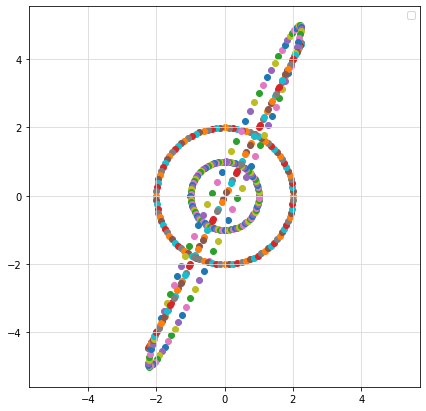

In [12]:
#Chllaenge
# generate xy plane to plot a circle A
# create a 2x2 matrix (starting with identity matrix)
# multiply matrix by a coordinate
# plot a new matrix
# try with a singular matrix (non invertible, columns form a linearly depandent set)
# try with various matrix
Theta = []
matrix1 = np.eye(2)*2
matrix2 = np.array([[1,2],[3,4]])
matrix3 = np.array([[1,2],[2,4]])
terms = np.linspace(0, np.pi*2, 100)
plt.figure(1, figsize=(7,7))
plt.axis('equal')
plt.legend(["circle", "aa"])
plt.grid(b=True, color='#D8D8D8')

for x in range(len(terms)):
    thetas = x * 2*np.pi/100
    Theta.append(thetas)
    A1 = np.array([np.cos(thetas), np.sin(thetas)])
    A2 = matrix1@A1
    A3 = matrix2@A1
    A4 = matrix3@A1
    
    plt.scatter(A1[0], A1[1])
    plt.scatter(A2[0], A2[1])
    plt.scatter(A3[0], A3[1])
    plt.scatter(A4[0], A4[1])



---
# VIDEO: Additive and multiplicative matrix identities
---


In [13]:
# size of matrices
n = 4

A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n,n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   ))
print(np.array_equal( A   , A@I ))
print(np.array_equal( A   , A+I ))
print(np.array_equal( A+Z , A@I ))


True
True
False
True



---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [14]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + np.matrix.transpose(A) )/2
print(S)
# A symmetric matrix minus its transpose should be all zeros
print( S-np.matrix.transpose(S) )


[[ 0.36797447  0.15713953  0.06296422 -2.18903909 -0.1633758 ]
 [ 0.15713953  1.07612104  0.59420933  0.21840724  0.51521812]
 [ 0.06296422  0.59420933 -0.49114966 -0.17910941  1.32852839]
 [-2.18903909  0.21840724 -0.17910941  0.22113881 -0.762586  ]
 [-0.1633758   0.51521812  1.32852839 -0.762586    0.8647491 ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [15]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - np.matrix.transpose(AtA) )
print( AAt - np.matrix.transpose(AAt) )



(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [16]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C = np.multiply( A,B )

print(C)

[[ 1.45240694e+00  2.17348392e-01]
 [-7.37044654e-01 -7.63501735e-01]
 [-1.93656657e-01  1.39180511e+00]
 [ 2.63469229e-01  3.69660166e-01]
 [ 7.10189428e-02 -7.10301782e-02]
 [-7.24403373e-01 -6.30396439e-01]
 [ 3.62620646e-05 -2.53183929e+00]
 [-9.58242396e-02  2.81420323e-02]
 [-3.65695238e-01 -8.63464538e-01]
 [-1.44367371e-02 -1.51417226e-01]
 [-3.32114945e-01  3.91296714e-01]
 [ 3.81789237e-01  2.28443008e+00]
 [-2.44462956e-02 -2.97204174e-03]]


In [17]:
#Challenge create two symmetric matrices
#compute sum, multiplication, and Hadamard multiplication of the two matrices
sm1 = np.array([[1,2],[2,4]])
sm2 = np.array([[3,5],[5,1]])

ret1 = sm1 + sm2
print(ret1)
ret2 = sm1@sm2
print(ret2)
ret3 = np.multiply(sm1, sm2)
print(ret3)


#determine whether the result is still symmetric

[[4 7]
 [7 5]]
[[13  7]
 [26 14]]
[[ 3 10]
 [10  4]]



---
# VIDEO: Multiplication of two symmetric matrices
---


In [18]:
# using the sympy library
from sympy import *

#declaring variables with symbols
#https://docs.sympy.org/latest/modules/core.html#module-sympy.core.symbol
a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )

Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [19]:
# Challenge
# craete two matrices (4x4) Full and diagonal 
#multply each matrix by itself (A*A): standard and hadmard multiplication.
np.random.seed(0)
A = np.random.randint(0,10, 16).reshape(4,4)
B = np.diag(np.random.randint(0,10,4))

print(A@A)
print(np.multiply(A,A))
print(B@B)
print(np.multiply(B,B))

[[ 55  36  39  51]
 [144 133  74 114]
 [100 112  73 104]
 [146 124  61 106]]
[[25  0  9  9]
 [49 81  9 25]
 [ 4 16 49 36]
 [64 64  1 36]]
[[49  0  0  0]
 [ 0 49  0  0]
 [ 0  0 64  0]
 [ 0  0  0  1]]
[[49  0  0  0]
 [ 0 49  0  0]
 [ 0  0 64  0]
 [ 0  0  0  1]]


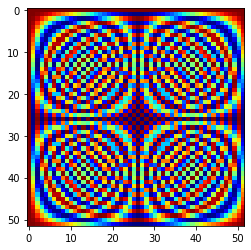

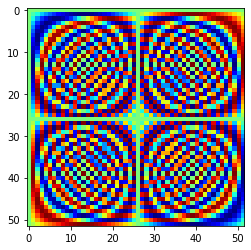

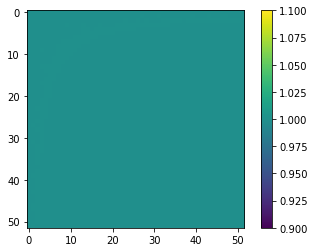

X1 == X2: True


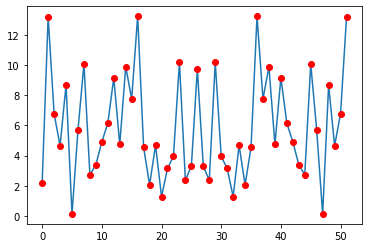

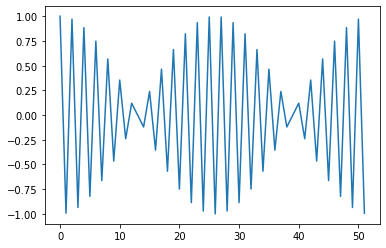

In [56]:
#Challenge
#Fourier tranform via matrix multiplication
# https://darkpgmr.tistory.com/171
# complex matrix
# vector
# vector of fourier coefficient
n = 52;
F = np.zeros((n,n), dtype=complex)
omega = np.e**(-2*np.pi*1j/n) 
for j in range(n):
    for k in range(n):
        m = j*k
        F[j,k] = omega**m;

plt.imshow(F.real, cmap='jet')
plt.show()

plt.imshow(F.imag, cmap='jet')
plt.show()

plt.imshow(abs(F))
plt.colorbar()
plt.show()
      
x = np.random.randn(n)
# x is a random input signal
X1 = F@x
X2 = np.fft.fft(x)
print(f'X1 == X2: {np.allclose(X1, X2)}')
 
# plot them
plt.figure()
plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()
plt.plot(F.real[:,25])
plt.show()

In [ ]:
# but AB neq (AB)
# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])

print(A)
print(B)
print(A@B - (A@B).T)

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]
print(A1)
print(B1)

A1@B1 - (A1*B1).T


---
# VIDEO: Frobenius dot-product
---


In [ ]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)
print(A)
print(B)

# first vectorize, then vector-dot-product
Av = np.reshape( A,36, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,36, order='F' )
print(Av)
print(Bv)

frob_dp = np.dot( Av,Bv )

In [ ]:
# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

In [ ]:
# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)